In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [3]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])

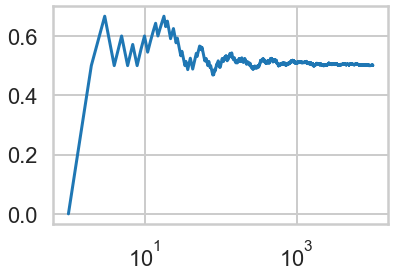

In [4]:
plt.plot(sequence_lengths, running_means);
plt.xscale('log')

In [5]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [6]:
make_throws(number_of_samples=20, sample_size=10)

array([0.6, 0.5, 0.7, 0.4, 0.5, 0.7, 0.8, 0.4, 0.5, 0.6, 0.7, 0.8, 0.6,
       0.2, 0.6, 0.3, 0.7, 0.8, 0.5, 0.4])

In [7]:
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

In [8]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

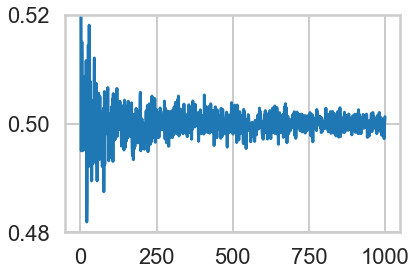

In [9]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);

In [10]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

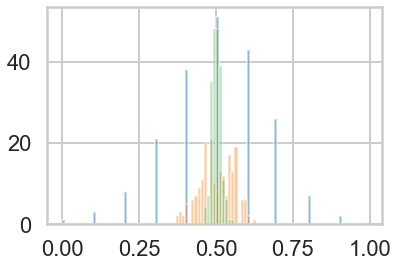

In [11]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3);

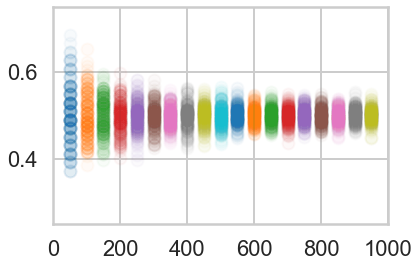

In [12]:
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

In [13]:
std_of_sample_means_1000 = [np.std(means) for means in sample_means]

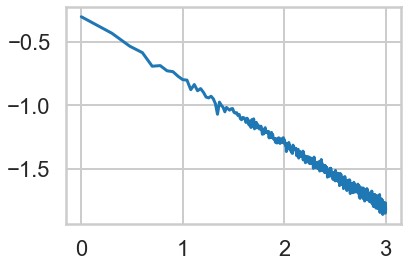

In [14]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means_1000));

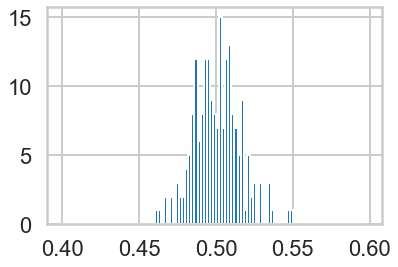

In [15]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002));

Text(0.5, 0, '$x$')

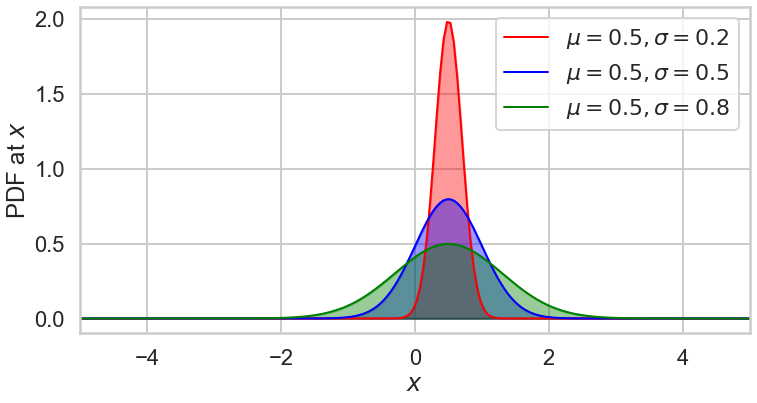

In [16]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)


fig = plt.figure(figsize=(12,6))
colors = ["r", "b", "g"]
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], colors):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

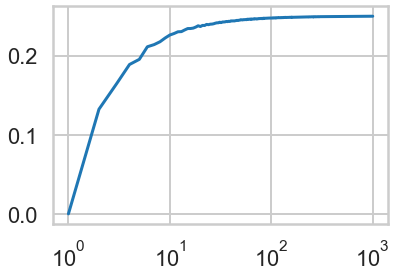

In [17]:
def make_throws_var(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000);
plt.xscale("log");

c:\users\kteja\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


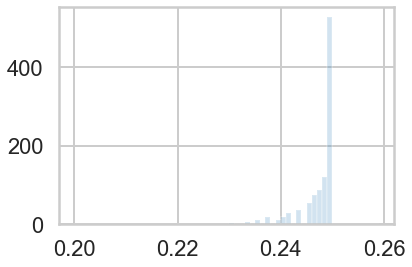

In [18]:
plt.hist(sample_vars_1000_replicates[99], bins=np.arange(0.2,0.26,0.001), alpha=0.2, normed=True);

In [19]:
gallup_2012=pd.read_csv("g12.csv").set_index('State')
gallup_2012["Unknown"] = 100 - gallup_2012.Democrat - gallup_2012.Republican
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1


In [20]:
gallup_2012["SE_percentage"]=100.0*np.sqrt((gallup_2012.Democrat/100.)*((100. - gallup_2012.Democrat)/100.)/(gallup_2012.N -1))
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown,SE_percentage
State,,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4,0.849059
Alaska,35.9,44.3,-8.4,402,19.8,2.395543
Arizona,39.8,47.3,-7.5,4325,12.9,0.744384
Arkansas,41.5,40.8,0.7,2071,17.7,1.082971
California,48.3,34.6,13.7,16197,17.1,0.392658


In [21]:
from scipy.special import erf
def uncertain_gallup_model(gallup):
    sigma = 3
    prob =  .5 * (1 + erf(gallup.Dem_Adv / np.sqrt(2 * sigma**2)))
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

In [22]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
model = uncertain_gallup_model(gallup_2012)
model = model.join(predictwise.Votes)

c:\users\kteja\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


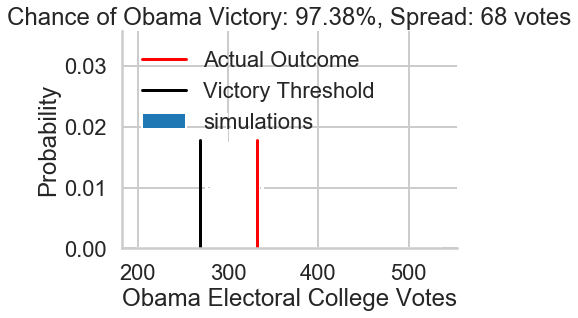

In [23]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)
prediction = simulate_election(model, 10000)
plot_simulation(prediction)